In [1]:
import pandas as pd
import numpy as np
import openpyxl
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [2]:
file_path = 'train_set.xlsx'
data = pd.read_excel(file_path)

In [3]:
m = data.iloc[:, 3]
p = data.iloc[:, 2]
f = data.iloc[:, 1]
b = data.iloc[:, 5:]

In [4]:
b_lists = b.values.tolist()

In [5]:
def igse_loss(B_t, f, k, a, b):
    T = 1 / f
    N = len(B_t)
    dt = T / N
    dB_dt = np.gradient(B_t, dt)
    loss_integral = k * np.abs(dB_dt) ** a * np.abs(B_t) ** (b - a)
    loss = np.trapz(loss_integral, dx=dt) / T
    return loss

def loss_model(X, k, a, b):
    B_t, f = X
    return igse_loss(B_t, f, k, a, b)

def fit_igse_params(B_t_list, f_list, measured_losses):
    X = [(B_t, f) for B_t, f in zip(B_t_list, f_list)]
    popt, _ = curve_fit(lambda x, k, a, b: [loss_model((B_t, f), k, a, b) for B_t, f in X], 
                         np.zeros(len(X)), measured_losses, p0=[3, 1.5, 2.5])
    return popt

In [6]:
def steinmetz(f, B, k, a, b):
    return k * (f ** a) * (B ** b)

def combined_steinmetz(x, k, a, b):
    f = x[0]
    B = x[1]
    return steinmetz(f, B, k, a, b)

In [7]:
def calculate_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    mre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return r2, mape, mse, mae, mre

In [8]:
class1_p=[]
class1_f=[]
class1_b=[]

class2_p=[]
class2_f=[]
class2_b=[]

class3_p=[]
class3_f=[]
class3_b=[]

class4_p=[]
class4_f=[]
class4_b=[]


for i in range(len(m)):
    if m[i]==1:
        class1_p.append(p[i])
        class1_f.append(f[i])
        class1_b.append(b_lists[i])
        
    if m[i]==2:
        class2_p.append(p[i])
        class2_f.append(f[i])
        class2_b.append(b_lists[i])
    
    if m[i]==3:
        class3_p.append(p[i])
        class3_f.append(f[i])
        class3_b.append(b_lists[i])
        
    if m[i]==4:
        class4_p.append(p[i])
        class4_f.append(f[i])
        class4_b.append(b_lists[i])

In [9]:
#1
k1, a1, b1 = fit_igse_params(class1_b, class1_f, class1_p)
print(f"拟合结果: k = {k1:.6e}, a = {a1:.6f}, b = {b1:.6f}")

predicted_loss1 = [igse_loss(b, f, k1, a1, b1) for b, f in zip(class1_b, class1_f)]
r2, mape, mse, mae, mre = calculate_metrics(class1_p, predicted_loss1)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

拟合结果: k = 2.373890e-02, a = 1.590496, b = 2.204661
R²: 0.9577
MAPE: 43.7999%
MSE: 4602463141.7111
MAE: 34581.1253
MRE: 43.7999%


In [10]:
#2
k2, a2, b2 = fit_igse_params(class2_b, class2_f, class2_p)
print(f"拟合结果: k = {k2:.6e}, a = {a2:.6f}, b = {b2:.6f}")

predicted_loss2 = [igse_loss(b, f, k2, a2, b2) for b, f in zip(class2_b, class2_f)]
r2, mape, mse, mae, mre = calculate_metrics(class2_p, predicted_loss2)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

拟合结果: k = 4.152146e-02, a = 1.570141, b = 2.223999
R²: 0.9637
MAPE: 44.1659%
MSE: 6269844973.9369
MAE: 41509.1088
MRE: 44.1659%


In [11]:
#3
k3, a3, b3 = fit_igse_params(class3_b, class3_f, class3_p)
print(f"拟合结果: k = {k3:.6e}, a = {a3:.6f}, b = {b3:.6f}")

predicted_loss3 = [igse_loss(b, f, k3, a3, b3) for b, f in zip(class3_b, class3_f)]
r2, mape, mse, mae, mre = calculate_metrics(class3_p, predicted_loss3)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

拟合结果: k = 1.382914e-01, a = 1.501410, b = 2.264799
R²: 0.9715
MAPE: 38.0242%
MSE: 6209107897.8172
MAE: 40541.7404
MRE: 38.0242%


In [12]:
#4
k4, a4, b4 = fit_igse_params(class4_b, class4_f, class4_p)
print(f"拟合结果: k = {k4:.6e}, a = {a4:.6f}, b = {b4:.6f}")

predicted_loss4 = [igse_loss(b, f, k4, a4, b4) for b, f in zip(class4_b, class4_f)]
r2, mape, mse, mae, mre = calculate_metrics(class4_p, predicted_loss4)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

拟合结果: k = 3.056689e-01, a = 1.449756, b = 2.265780
R²: 0.9633
MAPE: 46.4844%
MSE: 1920803175.1934
MAE: 22464.0360
MRE: 46.4844%


In [13]:
test_file_path = 'test_set.xlsx'
test_data = pd.read_excel(test_file_path)
test_m = test_data.iloc[:, 3]
test_p = test_data.iloc[:, 2]
test_f = test_data.iloc[:, 1]
test_b = test_data.iloc[:, 5:]
test_b_lists = test_b.values.tolist()

In [14]:
test1_p=[]
test1_f=[]
test1_b=[]

test2_p=[]
test2_f=[]
test2_b=[]

test3_p=[]
test3_f=[]
test3_b=[]

test4_p=[]
test4_f=[]
test4_b=[]


for i in range(len(test_m)):
    if m[i]==1:
        test1_p.append(test_p[i])
        test1_f.append(test_f[i])
        test1_b.append(test_b_lists[i])
        
    if m[i]==2:
        test2_p.append(test_p[i])
        test2_f.append(test_f[i])
        test2_b.append(test_b_lists[i])
    
    if m[i]==3:
        test3_p.append(test_p[i])
        test3_f.append(test_f[i])
        test3_b.append(test_b_lists[i])
        
    if m[i]==4:
        test4_p.append(test_p[i])
        test4_f.append(test_f[i])
        test4_b.append(test_b_lists[i])

In [16]:
#1
predicted_test1 = [igse_loss(b, f, k1, a1, b1) for b, f in zip(test1_b, test1_f)]
r2, mape, mse, mae, mre = calculate_metrics(test1_p, predicted_test1)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

R²: 0.8723
MAPE: 29.2678%
MSE: 18505593097.5182
MAE: 63117.8172
MRE: 29.2678%


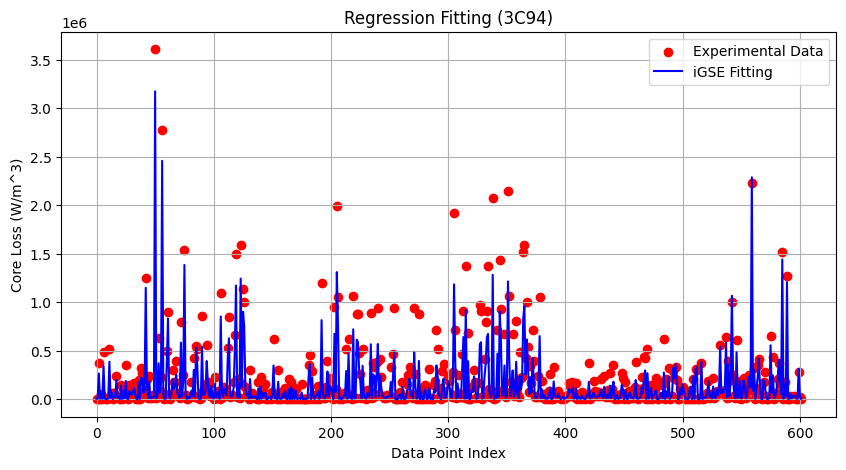

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(test1_p)), test1_p, label='Experimental Data', color='red')
plt.plot(range(len(test1_p)), predicted_test1, label='iGSE Fitting', color='blue')
plt.xlabel('Data Point Index')
plt.ylabel('Core Loss (W/m^3)')
plt.legend()
plt.title('Regression Fitting (3C94)')
plt.grid()
plt.savefig('igse_1.png', bbox_inches='tight', dpi=300)
plt.show()

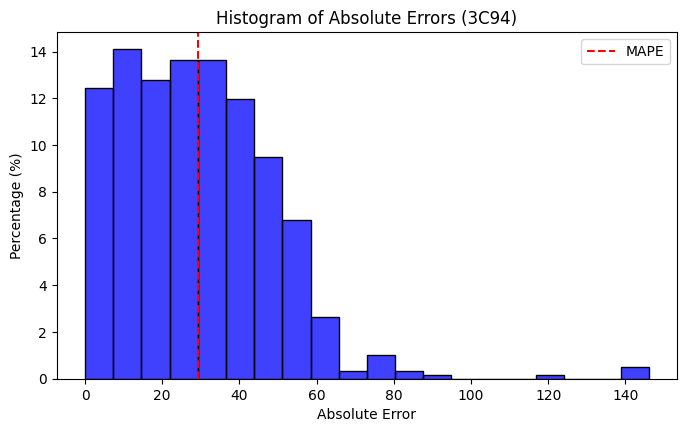

In [86]:
residuals1 = np.array(test1_p) - predicted_test1
percentage_errors1 = np.abs((residuals1 / np.array(test1_p)) * 100)
plt.figure(figsize=(8,4.5))
sns.histplot(percentage_errors1, bins=20, color='blue', stat='percent', edgecolor='black')
plt.title('Histogram of Absolute Errors (3C94)')
plt.xlabel('Absolute Error')
plt.ylabel('Percentage (%)')
plt.axvline(29.2678, color='red', linestyle='--', label='MAPE')  # 添加零误差线
plt.legend()
plt.savefig('igse_r1.png', bbox_inches='tight', dpi=300)
plt.show()

In [67]:
#2
predicted_test2 = [igse_loss(b, f, k2, a2, b2) for b, f in zip(test2_b, test2_f)]
r2, mape, mse, mae, mre = calculate_metrics(test2_p, predicted_test2)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

R²: 0.9501
MAPE: 44.2794%
MSE: 5590188918.0558
MAE: 37984.9929
MRE: 44.2794%


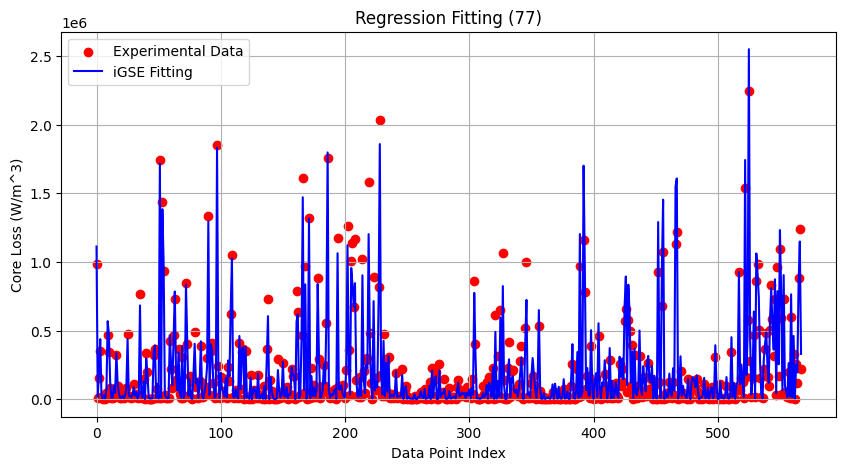

In [68]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(test2_p)), test2_p, label='Experimental Data', color='red')
plt.plot(range(len(test2_p)), predicted_test2, label='iGSE Fitting', color='blue')
plt.xlabel('Data Point Index')
plt.ylabel('Core Loss (W/m^3)')
plt.legend()
plt.title('Regression Fitting (77)')
plt.grid()
plt.savefig('igse_2.png', bbox_inches='tight', dpi=300)
plt.show()

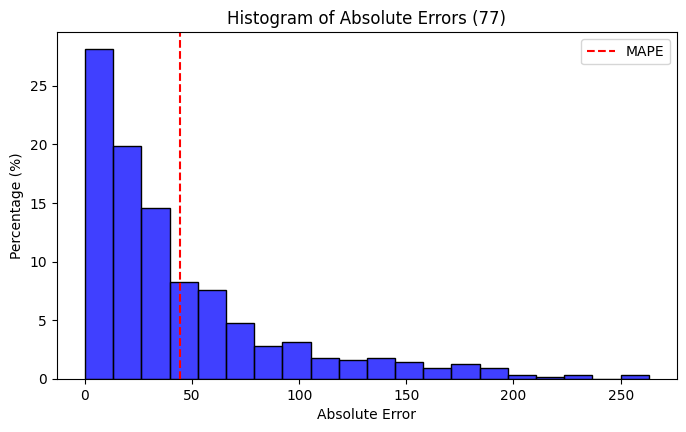

In [88]:
residuals2 = np.array(test2_p) - predicted_test2
percentage_errors2 = np.abs((residuals2 / np.array(test2_p)) * 100)
plt.figure(figsize=(8,4.5))
sns.histplot(percentage_errors2, bins=20, color='blue', stat='percent', edgecolor='black')
plt.title('Histogram of Absolute Errors (77)')
plt.xlabel('Absolute Error')
plt.ylabel('Percentage (%)')
plt.axvline(44.2794, color='red', linestyle='--', label='MAPE')  # 添加零误差线
plt.legend()
plt.savefig('igse_r2.png', bbox_inches='tight', dpi=300)
plt.show()

In [72]:
#3
predicted_test3 = [igse_loss(b, f, k3, a3, b3) for b, f in zip(test3_b, test3_f)]
r2, mape, mse, mae, mre = calculate_metrics(test3_p, predicted_test3)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

R²: 0.9026
MAPE: 71.7531%
MSE: 10364674977.7520
MAE: 53645.2099
MRE: 71.7531%


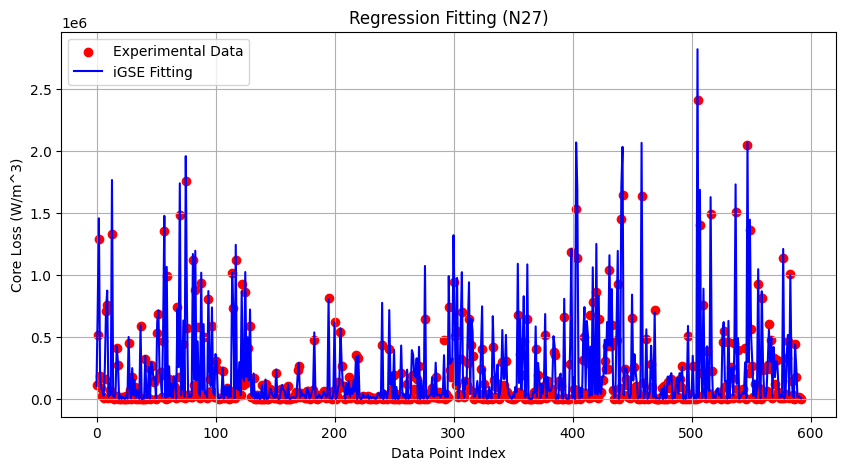

In [73]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(test3_p)), test3_p, label='Experimental Data', color='red')
plt.plot(range(len(test3_p)), predicted_test3, label='iGSE Fitting', color='blue')
plt.xlabel('Data Point Index')
plt.ylabel('Core Loss (W/m^3)')
plt.legend()
plt.title('Regression Fitting (N27)')
plt.grid()
plt.savefig('igse_3.png', bbox_inches='tight', dpi=300)
plt.show()

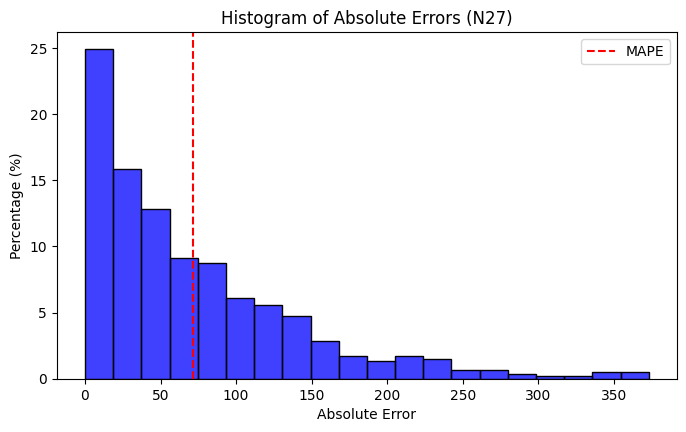

In [90]:
residuals3 = np.array(test3_p) - predicted_test3
percentage_errors3 = np.abs((residuals3 / np.array(test3_p)) * 100)
plt.figure(figsize=(8,4.5))
sns.histplot(percentage_errors3, bins=20, color='blue', stat='percent', edgecolor='black')
plt.title('Histogram of Absolute Errors (N27)')
plt.xlabel('Absolute Error')
plt.ylabel('Percentage (%)')
plt.axvline(71.7531, color='red', linestyle='--', label='MAPE')  # 添加零误差线
plt.legend()
plt.savefig('igse_r3.png', bbox_inches='tight', dpi=300)
plt.show()

In [78]:
#4
predicted_test4 = [igse_loss(b, f, k4, a4, b4) for b, f in zip(test4_b, test4_f)]
r2, mape, mse, mae, mre = calculate_metrics(test4_p, predicted_test4)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MRE: {mre:.4f}%")

R²: 0.9461
MAPE: 72.8611%
MSE: 1940086394.2095
MAE: 22796.8316
MRE: 72.8611%


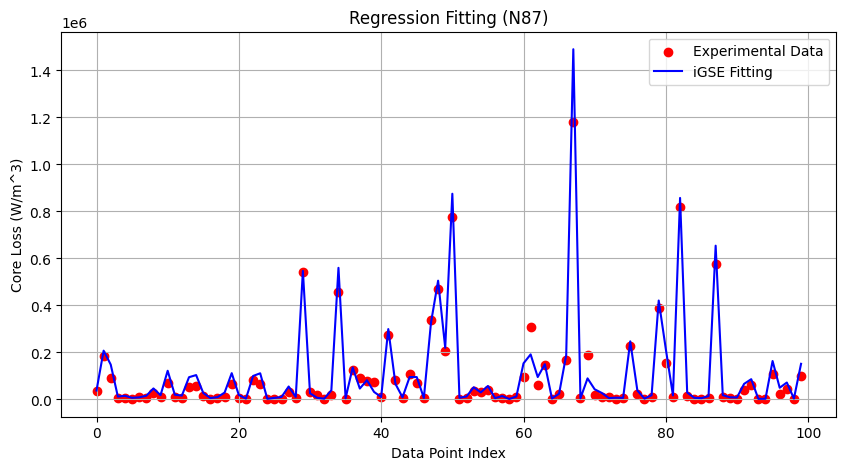

In [80]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(test4_p)), test4_p, label='Experimental Data', color='red')
plt.plot(range(len(test4_p)), predicted_test4, label='iGSE Fitting', color='blue')
plt.xlabel('Data Point Index')
plt.ylabel('Core Loss (W/m^3)')
plt.legend()
plt.title('Regression Fitting (N87)')
plt.grid()
plt.savefig('igse_4.png', bbox_inches='tight', dpi=300)
plt.show()

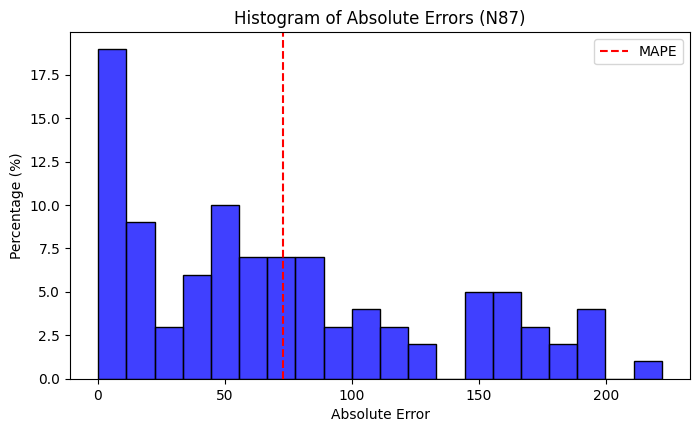

In [92]:
residuals4 = np.array(test4_p) - predicted_test4
percentage_errors4 = np.abs((residuals4 / np.array(test4_p)) * 100)
plt.figure(figsize=(8,4.5))
sns.histplot(percentage_errors4, bins=20, color='blue', stat='percent', edgecolor='black')
plt.title('Histogram of Absolute Errors (N87)')
plt.xlabel('Absolute Error')
plt.ylabel('Percentage (%)')
plt.axvline(72.8611, color='red', linestyle='--', label='MAPE')  # 添加零误差线
plt.legend()
plt.savefig('igse_r4.png', bbox_inches='tight', dpi=300)
plt.show()

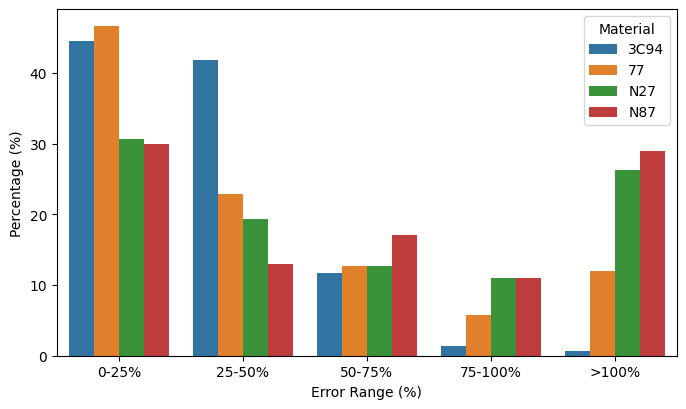

In [24]:
material_1_errors = percentage_errors1
material_2_errors = percentage_errors2
material_3_errors = percentage_errors3
material_4_errors = percentage_errors4

# 误差区间定义
bins = [0, 25, 50, 75, 100, np.inf]
bin_labels = ['0-25%', '25-50%', '50-75%', '75-100%', '>100%']

# 计算每种材料在各区间的百分比
def calculate_percentages(errors):
    counts, _ = np.histogram(np.abs(errors), bins=bins)
    percentages = (counts / len(errors)) * 100  # 计算百分比
    return percentages

# 为每种材料计算百分比
material_1_percentages = calculate_percentages(material_1_errors)
material_2_percentages = calculate_percentages(material_2_errors)
material_3_percentages = calculate_percentages(material_3_errors)
material_4_percentages = calculate_percentages(material_4_errors)

# 合并为 DataFrame
df = pd.DataFrame({
    'Error Range': bin_labels,
    '3C94': material_1_percentages,
    '77': material_2_percentages,
    'N27': material_3_percentages,
    'N87': material_4_percentages
})

# 将 DataFrame 转换为长格式，以便进行分组条形图绘制
df_melt = df.melt(id_vars='Error Range', var_name='Material', value_name='Percentage')

# 绘制分组条形图
plt.figure(figsize=(8,4.5))
sns.barplot(x='Error Range', y='Percentage', hue='Material', data=df_melt)
#plt.title('Error Distribution Across Materials')
plt.xlabel('Error Range (%)')
plt.ylabel('Percentage (%)')
plt.legend(title='Material')
plt.savefig('ieee7', bbox_inches='tight', dpi=300)
plt.show()